In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def drawGrid(image):
    for i in range(0, 640, 64):
        image = cv2.line(image, (0, i), (640, i), (255, 0, 0), 1)
        image = cv2.line(image, (i, 0), (i, 640), (255, 0, 0), 1)
    return image

In [3]:
def displayImages(images, names):
    fig = plt.figure(figsize=(10, 5), dpi=100)
    ax = []

    for index, image in enumerate(images):
        ax.append(fig.add_subplot(1, len(images), index + 1))
        ax[-1].set_title(names[index])
        plt.imshow(image, cmap='Greys_r')
    plt.show()

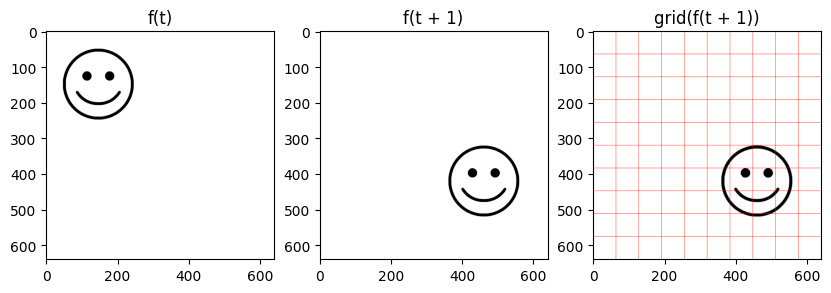

In [4]:
f_t0 = cv2.cvtColor(cv2.imread('f(t).jpg'), cv2.COLOR_BGR2GRAY)
f_t1 = cv2.cvtColor(cv2.imread('f(t + 1).jpg'), cv2.COLOR_BGR2GRAY)
grid_f_t1 = drawGrid(cv2.imread('f(t + 1).jpg'))
displayImages([f_t0, f_t1, grid_f_t1], ["f(t)", "f(t + 1)", "grid(f(t + 1))"])

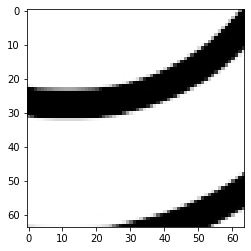

In [5]:
ROW_INDEX, COL_INDEX = 7, 7
frame = f_t1[64 * ROW_INDEX: 64 * ROW_INDEX + 64, 64 * COL_INDEX: 64 * COL_INDEX + 64]
plt.imshow(frame, cmap='Greys_r')

In [6]:
def template_matching(template, original):
    minSAD, resultX, resultY = 300 * 65 * 65, 0, 0
    for x in range(0, 640 - 64):
        for y in range(0, 640 - 64):
            SAD = np.sum(np.absolute(original[x: x + 64, y: y + 64] - template))
            if minSAD > SAD:
                minSAD, resultX, resultY = SAD, x, y
    return minSAD, resultX, resultY

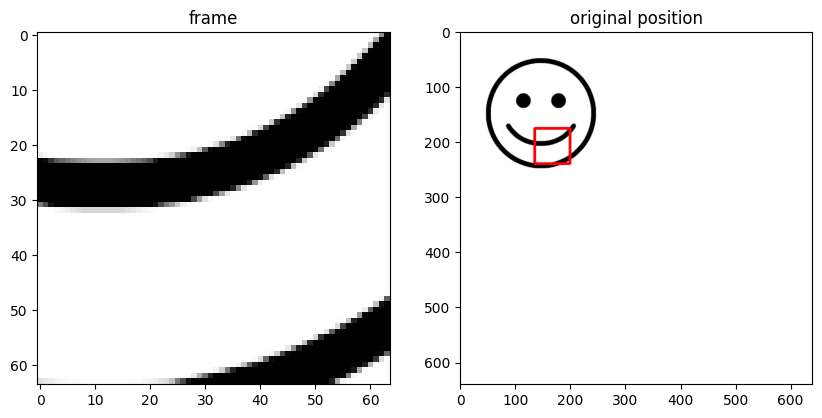

In [7]:
minSAD, x, y = template_matching(frame, f_t0)
result = cv2.rectangle(cv2.imread('f(t).jpg'), (y, x), (y + 64, x + 64), (255, 0, 0), 3)
displayImages([frame, result], ["frame", "original position"])